# Electrical Resistivity Arrays and their sensitivities

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pygimli as pg
import pygimli.meshtools as mt
import pygimli.physics.ert as ert
from pygimli.viewer.mpl import drawStreams
from pygimli.physics import ert
plt.style.use("seaborn-notebook")
# %matplotlib notebook

In [3]:
scheme = ert.DataContainer()
x = np.arange(10.)
for xi in x:
    scheme.createSensor([xi, 0])

scheme

Data: Sensors: 10 data: 0, nonzero entries: ['a', 'b', 'm', 'n']

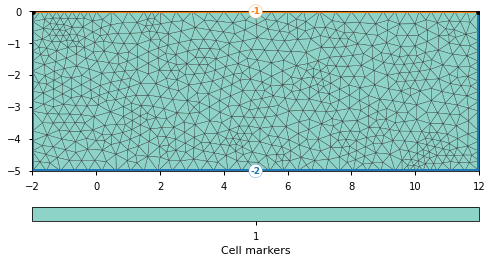

In [4]:
world = mt.createWorld(start=[-2, 0], end=[12, -5], worldMarker=True, marker=1)
for pos in scheme.sensorPositions():
    world.createNode(pos)

mesh = mt.createMesh(world, area=.1, quality=34, smooth=[1, 10])
pg.show(mesh, markers=True, showMesh=True);

In [42]:
def plotABMN(ax, scheme, idx):
    """ Visualize four-point configuration on given axes. """
    def getABMN(scheme, idx):
        """ Get coordinates of four-point cfg with id `idx` from DataContainerERT
        `scheme`."""
        coords = {}
        for elec in "abmn":
            elec_id = int(scheme(elec)[idx])
            if elec_id >= 0:
                elec_pos = scheme.sensorPosition(elec_id)
                coords[elec] = elec_pos.x(), elec_pos.y()
        return coords
    
    coords = getABMN(scheme, idx)
    for elec in coords:
        x, y = coords[elec]
        if elec in "ab":
            color = "green"
        else:
            color = "magenta"
        ax.plot(x, y, marker=".", color=color, ms=10)
        ax.annotate(elec.upper(), xy=(x, y), size=12, ha="center", #fontsize=10, 
                    bbox=dict(boxstyle="round", fc=(0.8, 0.8, 0.8), ec=color), 
                    xytext=(0, 20), textcoords='offset points', 
                    arrowprops=dict(arrowstyle="wedge, tail_width=.5", fc=color, ec=color,
                                    patchA=None, alpha=0.75))
        ax.plot(coords["a"][0],)

def showSensitivity(shm, mesh, idx=None):
    fop = ert.ERTModelling()
    fop.setData(shm)
    fop.setMesh(mesh)
    model = np.ones(mesh.cellCount())
    fop.createJacobian(model)
    idx = idx or range(shm.size())
    for i in idx:
        sens = fop.jacobian()[i]
        normsens = pg.utils.logDropTol(sens/mesh.cellSizes(), 1e-2)
        normsens /= np.max(normsens)
        ax, _ = pg.show(mesh, normsens, cMap="bwr", colorBar=False,# ax=ax,
                        label="sensitivity", nLevs=3, cMin=-1, cMax=1)
        plotABMN(ax, shm, i);
        ax.set_xlim(-2, 12)
        ax.set_ylim(-5, 1)

The current electrodes are denoted as A and B (or C1 and C2), whereas the potential electrodes are M and N (or P1 and P2).

## Classification
Generally, we distinguish three types according to their ordering:
* $\alpha$ arrays: C1-P1-P2-C2 most common and highest voltage (best S/N)
* $\beta$ arrays: C1-C2-P1-P2 lower voltage but good resolution (
* $\gamma$ arrays: C1-P1-C2-P2 quite uncommon

## Wenner ($\alpha$) array

`C1--na--P1--na--P2--na--C2` with the unit distance $a$ and an increasing separation factor $n$

In [32]:
we = ert.DataContainer(scheme)
we.addFourPointData(0, 3, 1, 2)
we.addFourPointData(1, 4, 2, 3)
we.addFourPointData(2, 5, 3, 4)
we.addFourPointData(3, 6, 4, 5)
we.addFourPointData(2, 8, 4, 6)
we.addFourPointData(0, 9, 3, 6)
we

Data: Sensors: 10 data: 6, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

17/11/22 - 22:45:36 - pyGIMLi - INFO - Found 1 regions.
17/11/22 - 22:45:36 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/11/22 - 22:45:36 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.


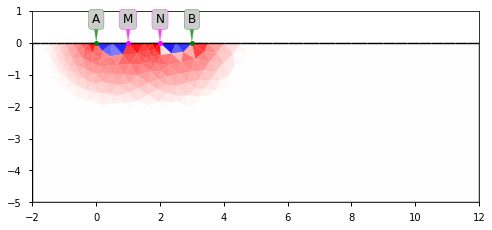

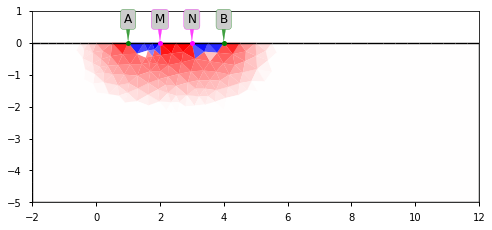

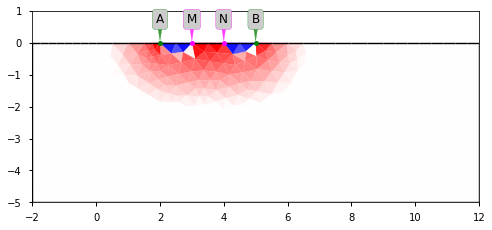

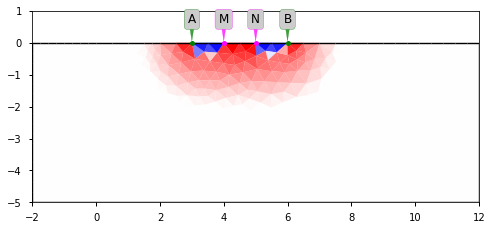

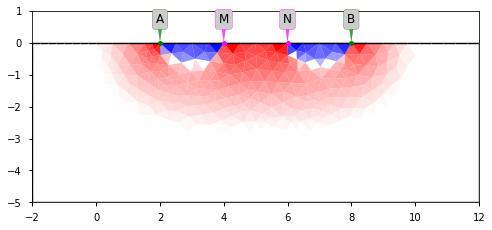

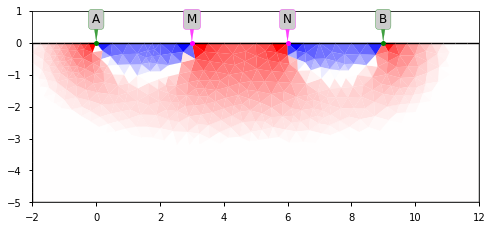

In [33]:
showSensitivity(we, mesh)

Data: Sensors: 10 data: 12, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

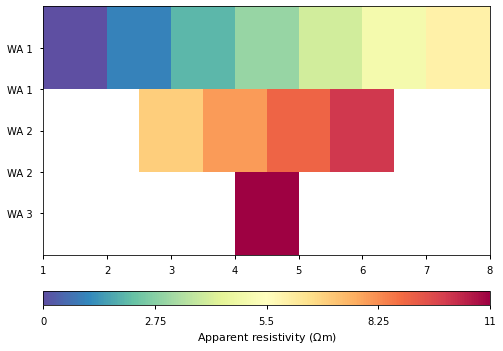

In [81]:
we = ert.createData(x, "wa")
ert.show(we, np.arange(we.size()))# ert.geometricFactor(we));
we

## Schlumberger array

`C1--na--P1-a-P2--na--C2` with the unit distance  $a$ and an increasing separation factor $n$

17/11/22 - 22:29:12 - pyGIMLi - INFO - Found 1 regions.
17/11/22 - 22:29:12 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/11/22 - 22:29:12 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.


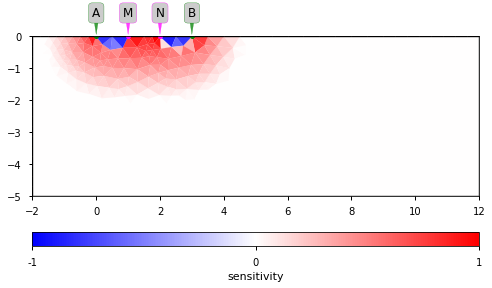

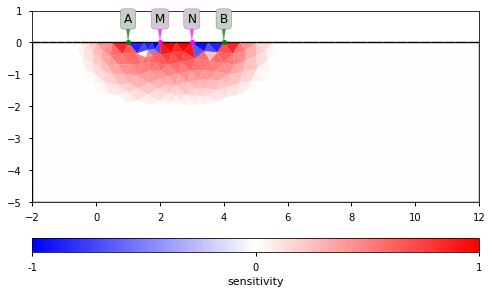

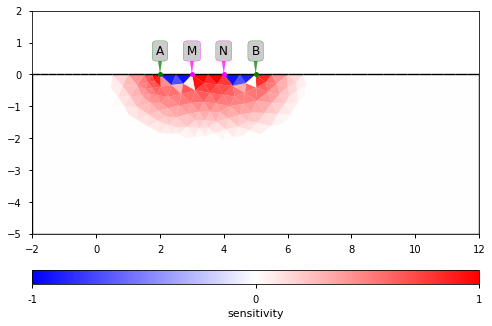

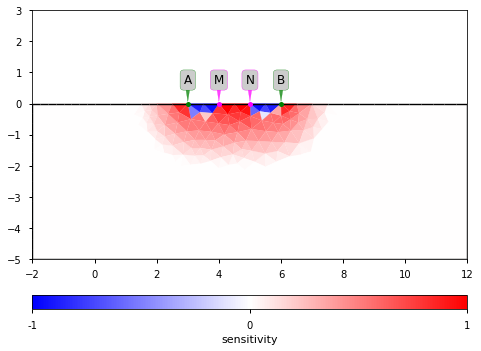

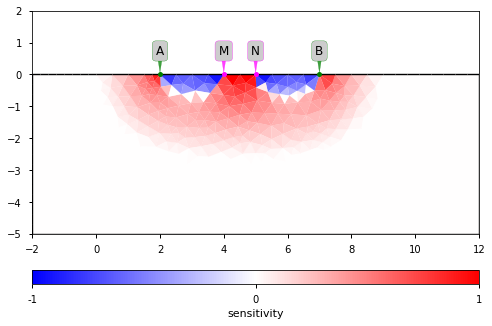

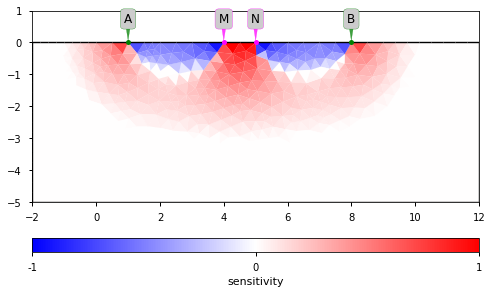

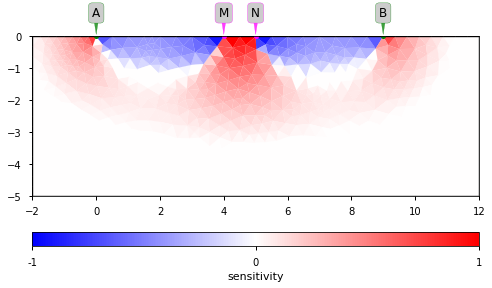

In [9]:
sl = ert.DataContainer(scheme)
sl.addFourPointData(0, 3, 1, 2)
sl.addFourPointData(1, 4, 2, 3)
sl.addFourPointData(2, 5, 3, 4)
sl.addFourPointData(3, 6, 4, 5)
sl.addFourPointData(2, 7, 4, 5)
sl.addFourPointData(1, 8, 4, 5)
sl.addFourPointData(0, 9, 4, 5)
showSensitivity(sl, mesh)

Data: Sensors: 10 data: 16, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

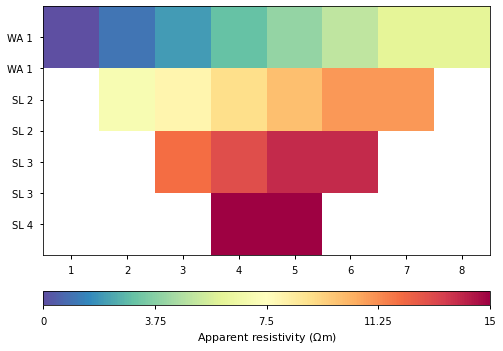

In [21]:
sl = ert.createData(x, "slm")
ert.show(sl, np.arange(sl.size()));#ert.geometricFactor(sl));
sl

## Dipole-Dipole array

`C1-a-C2--na--P1-a-P2` with the unit distance  $a$ and an increasing separation factor $n$

17/11/22 - 22:29:15 - pyGIMLi - INFO - Found 1 regions.
17/11/22 - 22:29:15 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/11/22 - 22:29:15 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.


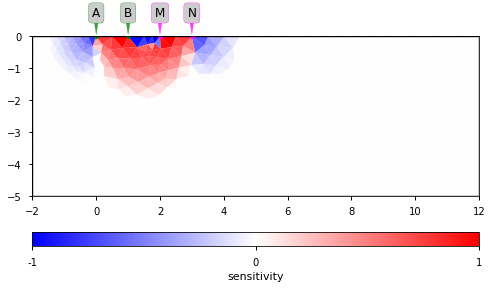

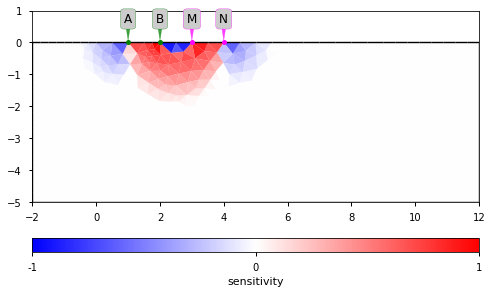

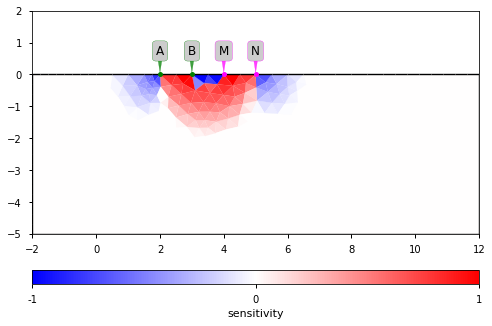

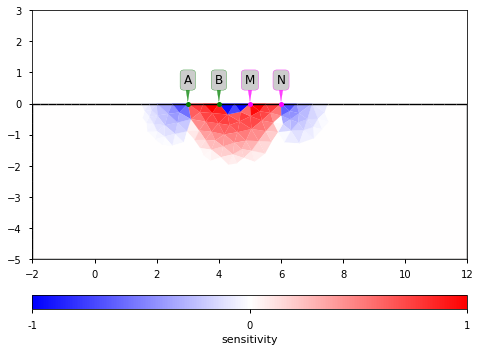

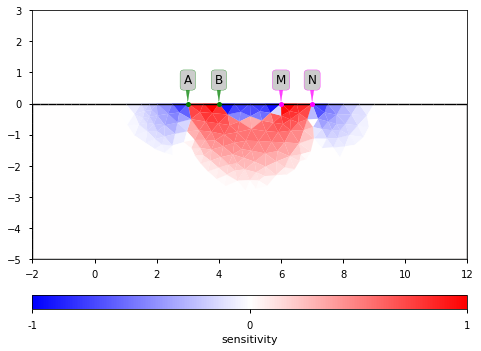

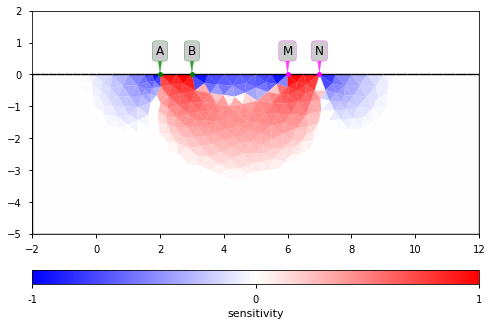

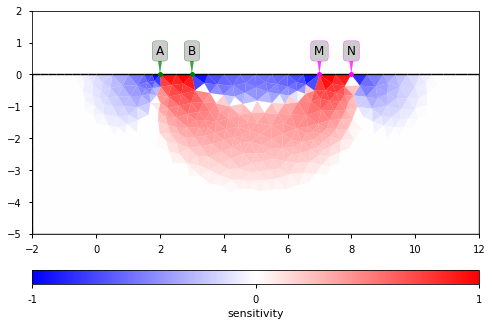

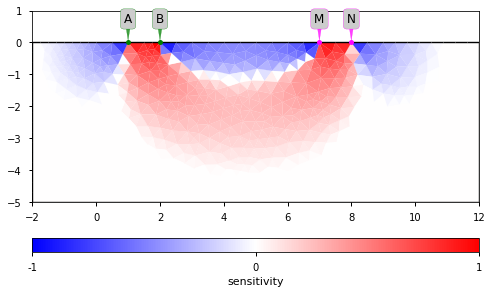

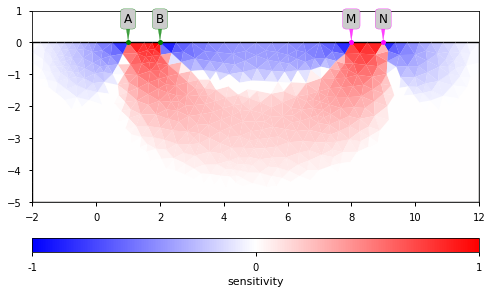

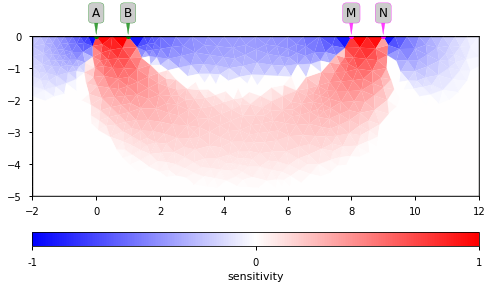

In [11]:
dd = ert.DataContainer(scheme)
dd.addFourPointData(0, 1, 2, 3)
dd.addFourPointData(1, 2, 3, 4)
dd.addFourPointData(2, 3, 4, 5)
dd.addFourPointData(3, 4, 5, 6)
dd.addFourPointData(3, 4, 6, 7)  # increasing dipole length
dd.addFourPointData(2, 3, 6, 7)
dd.addFourPointData(2, 3, 7, 8)
dd.addFourPointData(1, 2, 7, 8)
dd.addFourPointData(1, 2, 8, 9)
dd.addFourPointData(0, 1, 8, 9)
showSensitivity(dd, mesh)

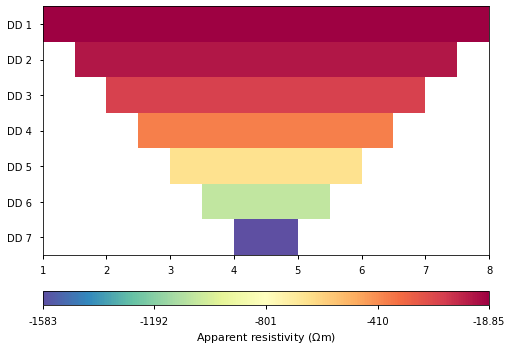

In [14]:
dd = ert.createData(x, "dd")
ert.show(dd, ert.geometricFactor(dd));

## Wenner ($\beta$) array

`C1--na--C2--na--P1--na--P2` with the unit distance $a$ and an increasing separation factor $n$

Data: Sensors: 10 data: 12, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

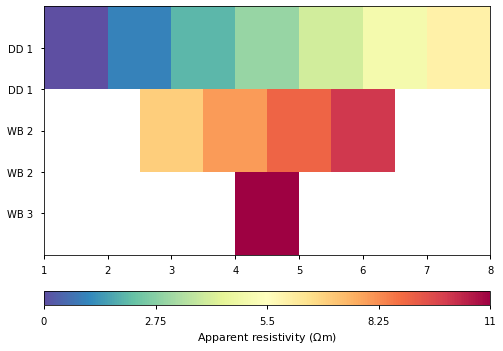

In [28]:
wb = ert.createData(x, "wb")
ert.show(wb, np.arange(wb.size()))# ert.geometricFactor(we));
wb

17/11/22 - 22:41:29 - pyGIMLi - INFO - Found 1 regions.
17/11/22 - 22:41:29 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/11/22 - 22:41:29 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.


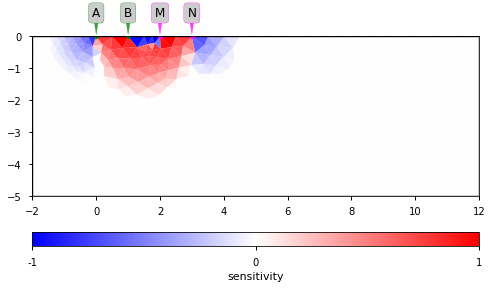

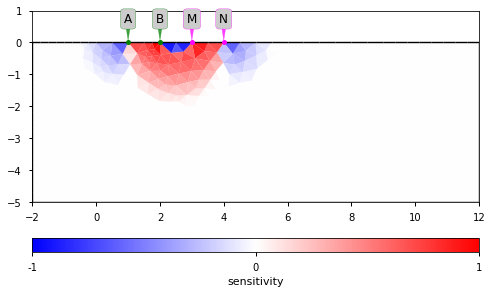

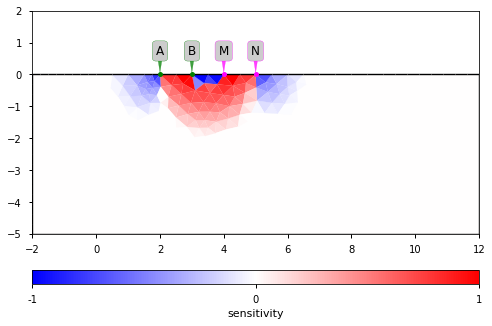

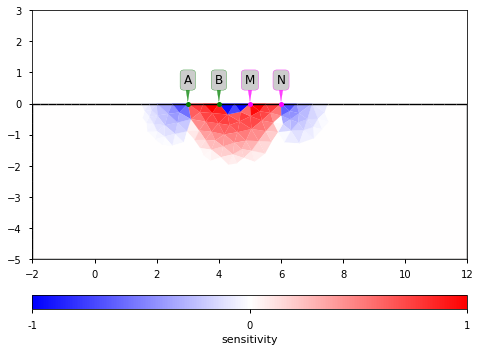

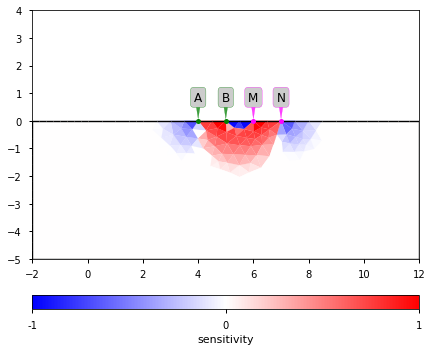

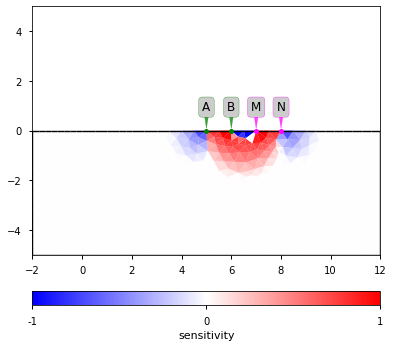

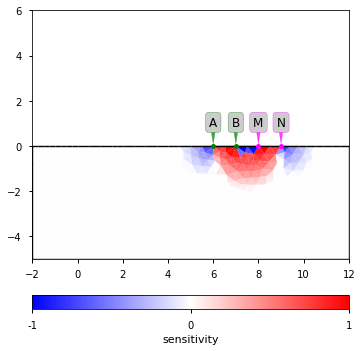

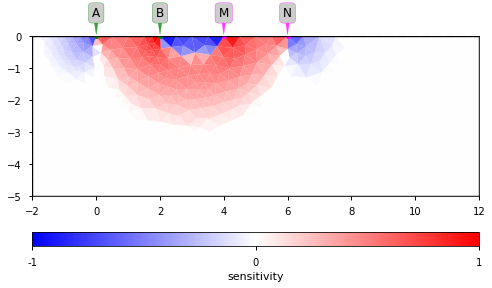

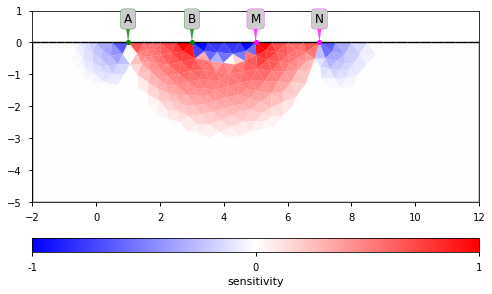

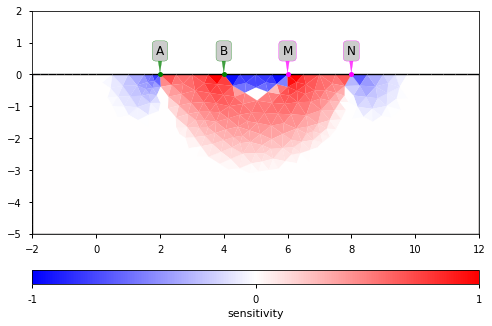

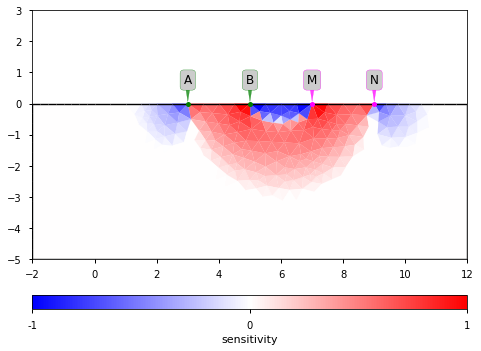

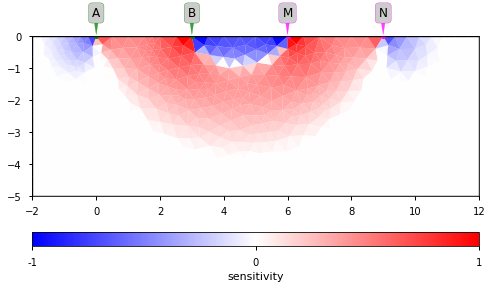

In [29]:
showSensitivity(wb, mesh)

## Multi-gradient array

Data: Sensors: 41 data: 322, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

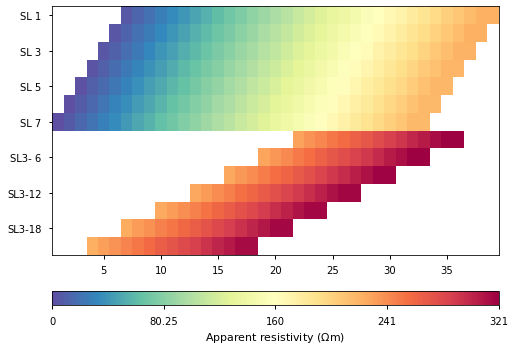

In [36]:
gr = ert.createData(np.arange(41.), "gr")
ert.show(gr, np.arange(gr.size()))#ert.geometricFactor(gr));
gr

## Pole-Dipole array

`C1--na--P1-a-P2` with the unit distance $a$ and an increasing separation factor $n$

Data: Sensors: 10 data: 36, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

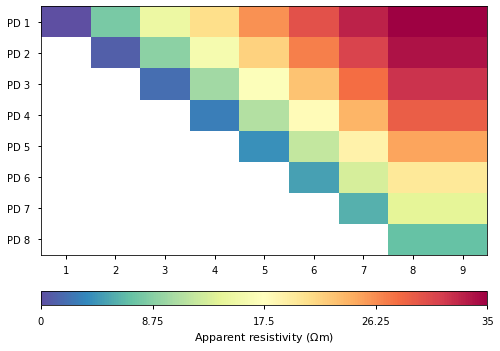

In [40]:
pd = ert.createData(x, "pd")
ert.show(pd, np.arange(pd.size()))# ert.geometricFactor(we));
pd

17/11/22 - 22:55:09 - pyGIMLi - INFO - Found 1 regions.
17/11/22 - 22:55:09 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/11/22 - 22:55:09 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.


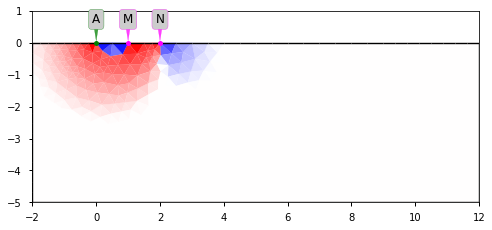

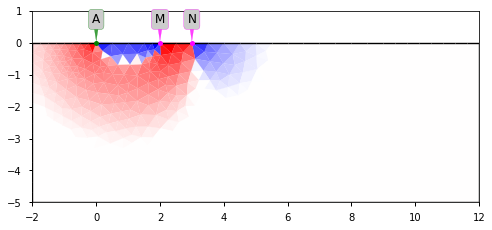

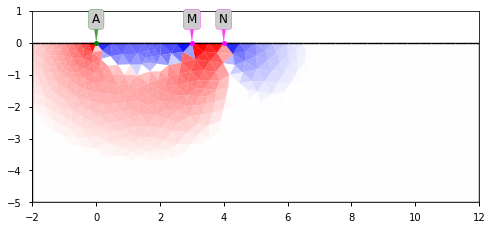

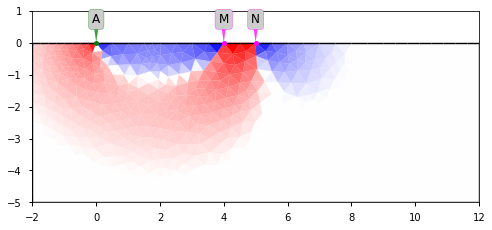

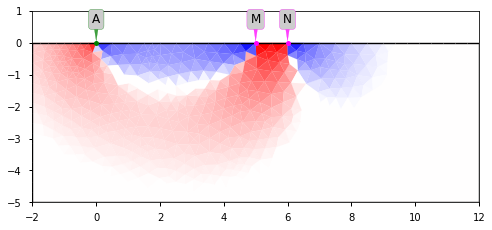

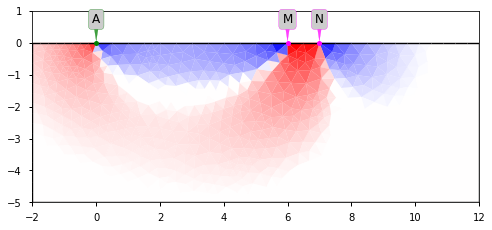

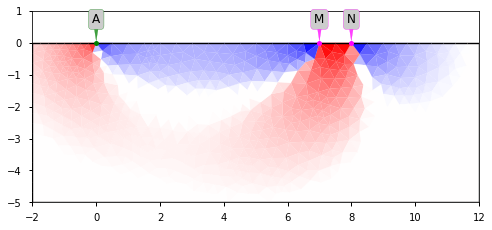

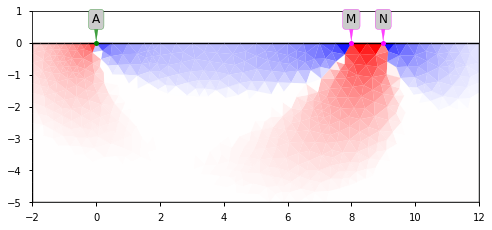

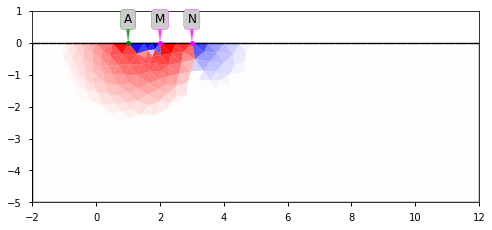

In [43]:
showSensitivity(pd, mesh, [0, 1, 2, 3, 4, 5, 6, 7, 8])

## Pole-Pole array

`C1--na--P1` with the unit distance $a$ and an increasing separation factor $n$

Data: Sensors: 10 data: 45, nonzero entries: ['a', 'b', 'm', 'n', 'valid']

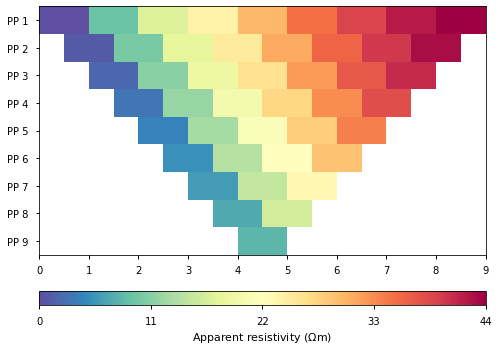

In [45]:
pp = ert.createData(x, "pp")
ert.show(pp, np.arange(pp.size()))# ert.geometricFactor(pp));
pp

17/11/22 - 22:57:04 - pyGIMLi - INFO - Found 1 regions.
17/11/22 - 22:57:04 - pyGIMLi - INFO - Creating forward mesh from region infos.
17/11/22 - 22:57:04 - pyGIMLi - INFO - Creating refined mesh (P2) to solve forward task.


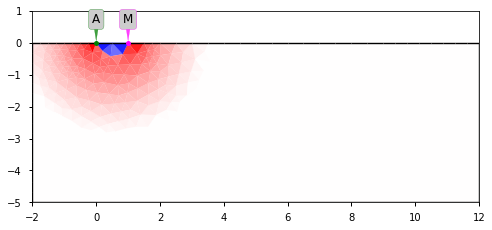

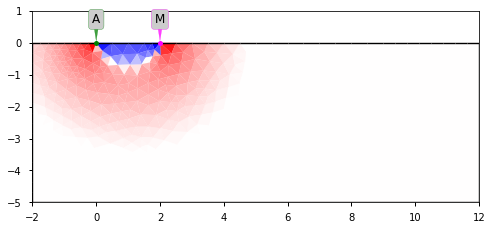

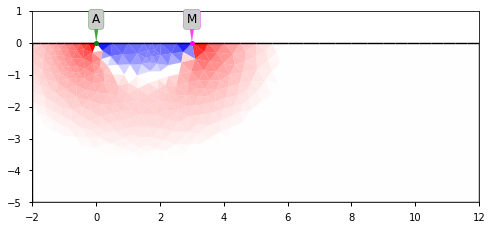

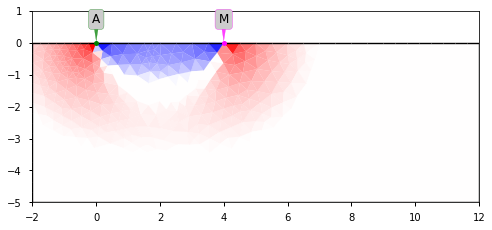

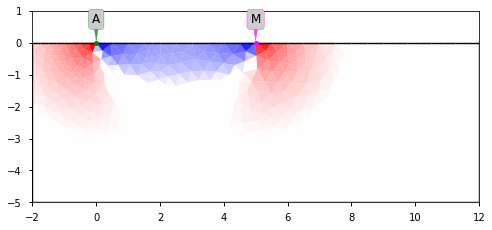

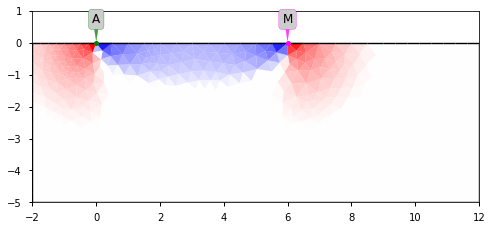

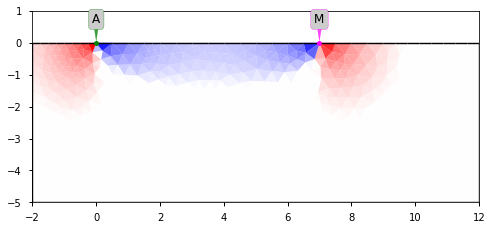

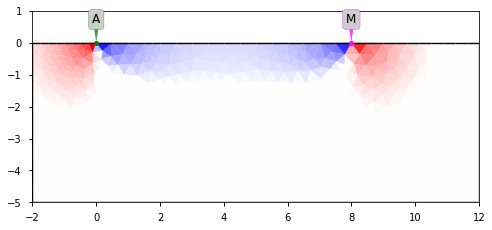

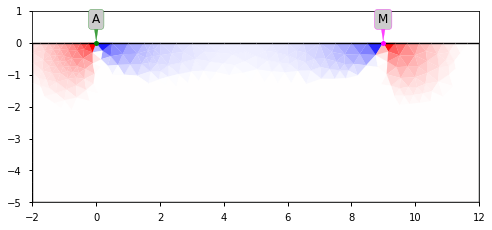

In [46]:
showSensitivity(pp, mesh, [0, 1, 2, 3, 4, 5, 6, 7, 8])

# Modelling

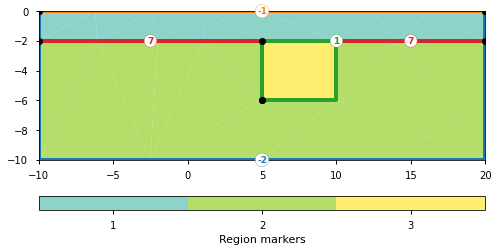

In [83]:
world = mt.createWorld(start=[-10, -10], end=[20, 0], layers=[-2], worldMarker=True)
cube = mt.createRectangle(start=[5, -6], end=[10, -2], marker=3)
geo = world + cube
pg.show(geo, markers=True);

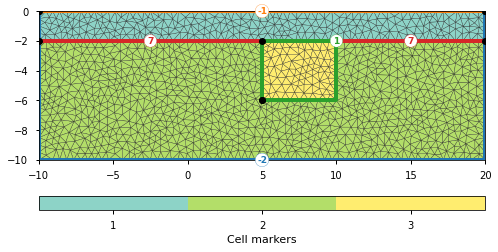

In [84]:
mesh = mt.createMesh(geo, area=0.2)
pg.show(mesh, markers=True, showMesh=True);

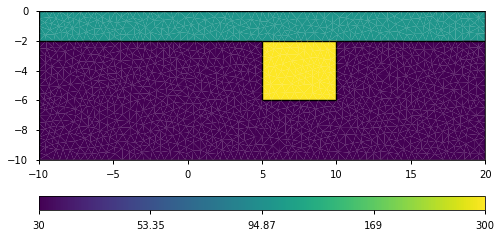

In [88]:
res = [[1, 100],  # sandy soil layer
       [2, 30],   # loam, till or clay layer
       [3, 300]]  # gravel lense
pg.show(mesh, res, logScale=True);

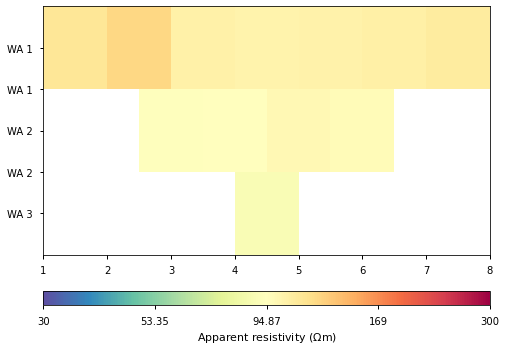

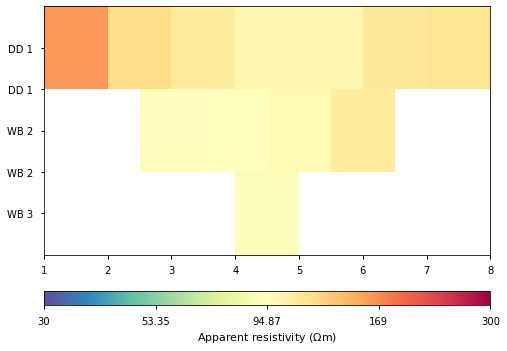

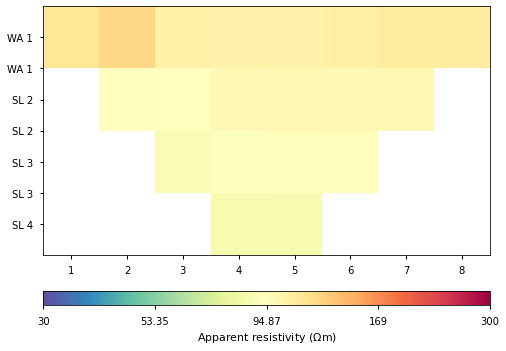

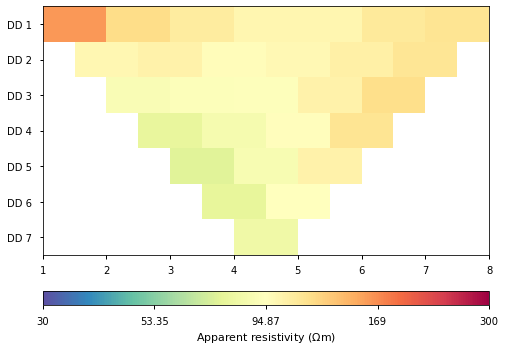

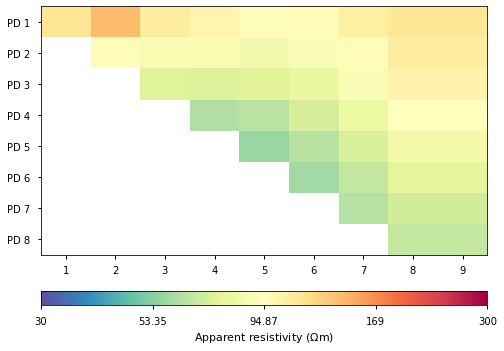

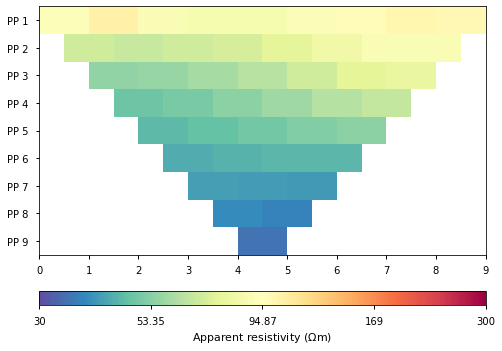

In [89]:
for data in [we, wb, sl, dd, pd, pp]:
    ert.show(ert.simulate(mesh, data, res), cMin=30, cMax=300);

# Wrap-up

1. There is a variety of different arrays
1. Moving along a profile creates a mapping curve
1. Increasing distances (separations) lead to sounding (increased depth)
1. Data are summarized in a pseudo-section (which is not a subsection!)
1. Numerical data analysis necessary for imaging
1. Sensitivity distribution allows to see area of influence